# What's in this notebook?
Here we'll do some preprocessing so that we can do some NLP (tokenizing & LDA), then visualize our results.


In [265]:
import pickle
import pandas as pd
import numpy as np

In [267]:
with open('transcripts_df.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    df1 = pickle.load(f)

with open('additional_data_df.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    df2 = pickle.load(f)

In [274]:
df = pd.concat([df1, pd.DataFrame(df2)])
df.index = range(len(df))

In [314]:
# dropping poorly scrapped transcripts from graduationwisdom.com
df.drop(df[(df.transcript.str.len() < 3300) & (df.index > 786) & (df.index < 1007)].index, inplace=True)

In [315]:
df

source  \
0           https://www.youtube.com/watch?v=bPv21OyQLkM   
1           https://www.youtube.com/watch?v=ngzIkKtjT6o   
2           https://www.youtube.com/watch?v=y5YvCbOmNxQ   
3           https://www.youtube.com/watch?v=Q34H3As2QJA   
4           https://www.youtube.com/watch?v=abo-YcLrnao   
5           https://www.youtube.com/watch?v=jsHBI4w4FgQ   
6           https://www.youtube.com/watch?v=9ZDuNzhelhQ   
7           https://www.youtube.com/watch?v=9LheUWrXUHU   
8           https://www.youtube.com/watch?v=TvI69F8uf1A   
9           https://www.youtube.com/watch?v=-vsLRM4Tjd0   
10          https://www.youtube.com/watch?v=wQ4A8NLMAbY   
11          https://www.youtube.com/watch?v=ArmeLya_pY8   
12          https://www.youtube.com/watch?v=RIS2dlnlsRo   
13          https://www.youtube.com/watch?v=907yEkALaAY   
14          https://www.youtube.com/watch?v=QOopQWWfRXA   
15          https://www.youtube.com/watch?v=0TgLYLuDjlY   
16          https://www.youtube.com/watch?v=erLem1Zijmo   
17          https://www.youtube.com/watch?v=MYOEAVlRy6k   
18          https://www.youtube.com/watch?v=kHU8aG1xi_M   
19          https://www.youtube.com/watch?v=SflExy5Lxzo   
20          https://www.youtube.com/watch?v=JRUOZgc3WL0   
21          https://www.youtube.com/watch?v=fqRgtaRMGtw   
22          https://www.youtube.com/watch?v=XMbt090GMRs   
23          https://www.youtube.com/watch?v=SAJH03U7aHM   
24          https://www.youtube.com/watch?v=GUCy75CA3Aw   
25          https://www.youtube.com/watch?v=oo18EZsVgUY   
26          https://www.youtube.com/watch?v=LN2ZlDdaOA8   
27          https://www.youtube.com/watch?v=IeKxySlQqcg   
28          https://www.youtube.com/watch?v=WiWLAEY4XK0   
29          https://www.youtube.com/watch?v=e0SsSr9Trro   
...                                                 ...   
1175  https://www.wellesley.edu/events/commencement/...   
1176  https://www.wellesley.edu/events/commencement/...   
1177  https://www.wellesley.edu/events/commencement/...   
1178  https://www.wellesley.edu/events/commencement/...   
1179  https://www.wellesley.edu/events/commencement/...   
1180  https://www.wellesley.edu/events/commencement/...   
1181  http://www.humanity.org/voices/commencements/m...   
1182  http://www.humanity.org/voices/commencements/w...   
1183  http://www.humanity.org/voices/commencements/l...   
1184  http://www.humanity.org/voices/commencements/r...   
1185  http://www.humanity.org/voices/commencements/n...   
1186  http://www.humanity.org/voices/commencements/r...   
1187  http://www.humanity.org/voices/commencements/v...   
1188  http://www.humanity.org/voices/commencements/c...   
1189  http://www.humanity.org/voices/commencements/l...   
1190  http://www.humanity.org/voices/commencements/m...   
1191  http://www.humanity.org/voices/commencements/g...   
1192  http://www.humanity.org/voices/commencements/m...   
1193  http://www.humanity.org/voices/commencements/u...   
1194  http://www.humanity.org/voices/commencements/h...   
1195  http://www.humanity.org/voices/commencements/w...   
1196  http://www.humanity.org/voices/commencements/t...   
1197  http://www.humanity.org/voices/commencements/g...   
1198  http://www.humanity.org/voices/commencements/w...   
1199     https://www.berklee.edu/commencement/past/1997   
1200  https://www.berklee.edu/commencement/2000/jsyk...   
1201  https://www.berklee.edu/commencement/2002/fost...   
1202          https://www.berklee.edu/commencement/2009   
1203  https://news.syr.edu/blog/2012/05/13/aaron-sor...   
1204                   http://gos.sbc.edu/k/khouri.html   

                                             transcript  
0     I'm pleased to welcome to the platform miss Ca...  
1     author Tom Wolfe addressed the graduating clas...  
2     ladies and gentlemen dr. Fred Rogers Wow it's ...  
3     I'd like to tell you too true stories evening ...  
4     thank you and I'm a doctor so pay attention fo...  
5     it is now my great pleasure to recog

In [600]:
[i for i in range(len(df)) if 'أن' in df.transcript.iloc[i]]

[31, 303]

In [616]:
df.iloc[31]

source              https://www.youtube.com/watch?v=UF8uR6Z6KLc
transcript    جامعة ستانفورد \nwww.stanford.edu هذا البرنامج...
processed     [جامعة, ستانفورد, www, stanford, edu, هذا, الب...
Name: 31, dtype: object

## Preprocessing
Removing punctuation, converting to lowercase, stop words, etc.

In [606]:
# while looking through the data, I found one of the transcripts is completely in Russian, 
# and two others are in Arabic -- whoops!
# I'll see if I can explicitly specify the english youtube transcript from the youtube transcript api
from youtube_transcript_api import YouTubeTranscriptApi

df.iloc[172].transcript = ' '.join([x['text'] for x in 
                                    YouTubeTranscriptApi.get_transcript(df.iloc[172].source[-11:],
                                                                        languages=['en'])
                                   ])

In [624]:
# due to a bug in the API, transcripts at index 31 and 303 aren't able to be retrieved from the API
# So, I got the transcripts from YouTube by copying and pasting them into a separate file.
from missing_transcripts import steve_jobs, obama

# for 31
i = 0
transcript_31 = ''
for line in steve_jobs.split('\n'):
    if i % 2 == 0 and i > 2:
        transcript_31 += line
    i += 1
    
df['transcript'].iloc[31] = transcript_31
df['processed'].iloc[31] = preprocess(df.transcript.iloc[31])

i=0
transcript_303 = ''
for line in obama.split('\n'):
    if i%2 == 0:
        transcript_303 += line
    i += 1

df['transcript'].iloc[303] = transcript_303
df['processed'].iloc[303] = preprocess(df.transcript.iloc[303])


In [137]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [317]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
import spacy


def preprocess(text):
    # remove punctuation
    punctuation = ['.', ',', '?', '/', "'", '"', 
                  ':', ';', ')', '(', '*', '&',
                  '^', '%', '$', '#', '!', '`', 
                   '-', '_', '[', ']', '<', '>',
                  '\n', '\r', '’', '~', '|']
    for punc in punctuation:
        text = text.replace(punc, ' ')
        
    # replace years with 'year'
    text = re.sub(r'(19|20)\d{2}\s', 'year ', text)
        
    # lowercase
    text = text.lower()
    
    # remove stopwords
    # adding 'applause' to nltk's list, since it
    # occurs a lot & is unhelpful 
    wordsFiltered = '' # collect non-stop-words
    stopWords = set(stopwords.words('english'))
    stopWords.add('applause')
    for w in word_tokenize(text):
        if w not in stopWords:
            wordsFiltered += w + ' '
    
    # lemmatize  
    # nltk's lemmatizer was garbage 
    # lemmatizer = WordNetLemmatizer() 
    # lemmatized = [lemmatizer.lemmatize(word) for word in wordsFiltered] 

    # Initialize spacy 'en' model, keeping only tagger component needed for lemmatization
    sp = spacy.load('en')

    # Parse the sentence using the loaded 'en' model object `nlp`
    lemmatized = sp(wordsFiltered)
    
    return [word.lemma_ for word in lemmatized]

In [318]:
# takes a loooooooooooooong time
df['processed'] = df.transcript.apply(lambda x: preprocess(x) if len(x) < 100000 else 'NEED TO PREPROCESS')

In [319]:
df

source  \
0           https://www.youtube.com/watch?v=bPv21OyQLkM   
1           https://www.youtube.com/watch?v=ngzIkKtjT6o   
2           https://www.youtube.com/watch?v=y5YvCbOmNxQ   
3           https://www.youtube.com/watch?v=Q34H3As2QJA   
4           https://www.youtube.com/watch?v=abo-YcLrnao   
5           https://www.youtube.com/watch?v=jsHBI4w4FgQ   
6           https://www.youtube.com/watch?v=9ZDuNzhelhQ   
7           https://www.youtube.com/watch?v=9LheUWrXUHU   
8           https://www.youtube.com/watch?v=TvI69F8uf1A   
9           https://www.youtube.com/watch?v=-vsLRM4Tjd0   
10          https://www.youtube.com/watch?v=wQ4A8NLMAbY   
11          https://www.youtube.com/watch?v=ArmeLya_pY8   
12          https://www.youtube.com/watch?v=RIS2dlnlsRo   
13          https://www.youtube.com/watch?v=907yEkALaAY   
14          https://www.youtube.com/watch?v=QOopQWWfRXA   
15          https://www.youtube.com/watch?v=0TgLYLuDjlY   
16          https://www.youtube.com/watch?v=erLem1Zijmo   
17          https://www.youtube.com/watch?v=MYOEAVlRy6k   
18          https://www.youtube.com/watch?v=kHU8aG1xi_M   
19          https://www.youtube.com/watch?v=SflExy5Lxzo   
20          https://www.youtube.com/watch?v=JRUOZgc3WL0   
21          https://www.youtube.com/watch?v=fqRgtaRMGtw   
22          https://www.youtube.com/watch?v=XMbt090GMRs   
23          https://www.youtube.com/watch?v=SAJH03U7aHM   
24          https://www.youtube.com/watch?v=GUCy75CA3Aw   
25          https://www.youtube.com/watch?v=oo18EZsVgUY   
26          https://www.youtube.com/watch?v=LN2ZlDdaOA8   
27          https://www.youtube.com/watch?v=IeKxySlQqcg   
28          https://www.youtube.com/watch?v=WiWLAEY4XK0   
29          https://www.youtube.com/watch?v=e0SsSr9Trro   
...                                                 ...   
1175  https://www.wellesley.edu/events/commencement/...   
1176  https://www.wellesley.edu/events/commencement/...   
1177  https://www.wellesley.edu/events/commencement/...   
1178  https://www.wellesley.edu/events/commencement/...   
1179  https://www.wellesley.edu/events/commencement/...   
1180  https://www.wellesley.edu/events/commencement/...   
1181  http://www.humanity.org/voices/commencements/m...   
1182  http://www.humanity.org/voices/commencements/w...   
1183  http://www.humanity.org/voices/commencements/l...   
1184  http://www.humanity.org/voices/commencements/r...   
1185  http://www.humanity.org/voices/commencements/n...   
1186  http://www.humanity.org/voices/commencements/r...   
1187  http://www.humanity.org/voices/commencements/v...   
1188  http://www.humanity.org/voices/commencements/c...   
1189  http://www.humanity.org/voices/commencements/l...   
1190  http://www.humanity.org/voices/commencements/m...   
1191  http://www.humanity.org/voices/commencements/g...   
1192  http://www.humanity.org/voices/commencements/m...   
1193  http://www.humanity.org/voices/commencements/u...   
1194  http://www.humanity.org/voices/commencements/h...   
1195  http://www.humanity.org/voices/commencements/w...   
1196  http://www.humanity.org/voices/commencements/t...   
1197  http://www.humanity.org/voices/commencements/g...   
1198  http://www.humanity.org/voices/commencements/w...   
1199     https://www.berklee.edu/commencement/past/1997   
1200  https://www.berklee.edu/commencement/2000/jsyk...   
1201  https://www.berklee.edu/commencement/2002/fost...   
1202          https://www.berklee.edu/commencement/2009   
1203  https://news.syr.edu/blog/2012/05/13/aaron-sor...   
1204                   http://gos.sbc.edu/k/khouri.html   

                                             transcript  \
0     I'm pleased to welcome to the platform miss Ca...   
1     author Tom Wolfe addressed the graduating clas...   
2     ladies and gentlemen dr. Fred Rogers Wow it's ...   
3     I'd like to tell you too true stories evening ...   
4     thank you and I'm a doctor so pay attention fo...   
5     it is now my great pleasure to

Let's pickle this since it took so long!

In [320]:
with open('processed_transcripts.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(df, f, pickle.HIGHEST_PROTOCOL)

Whoops, 46 still need to be preprocessed -- they were too large to process in the original batch, so let's figure that out now. Then we'll re-pickle. 

In [537]:
reprocess = [i for i in range(len(df)) if df.processed.iloc[i] == 'NEED TO PREPROCESS']

In [540]:
for i in reprocess:
    try:
        df.processed.iloc[i] = preprocess(df.transcript.iloc[i])
    except ValueError:
        print(i)

830


In [547]:
processed_830 = []
i=0
while i < len(df.transcript.iloc[840]):
    processed_830.extend(preprocess(df.transcript.iloc[830][i:i+100000]))
    i+=100000

In [548]:
df.processed.iloc[830] = processed_830

In [627]:
with open('processed_transcripts.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(df, f, pickle.HIGHEST_PROTOCOL)

## Vectorizing
We'll start with count vectorizing, and then we'll take a look at word2vec.

In [550]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [628]:
def get_top_n_words(ngram_start, ngram_end, corpus, n=10):
    """
    List the top n words in a vocabulary according to occurrence in corpus.
    """
    vec = CountVectorizer(ngram_range = (ngram_start, ngram_end))
    bag_of_words = vec.fit_transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [629]:
def graph_top_n_ngrams(corpus, n, ngram_start, ngram_end):
    """
    Given corpus, number of top words you want, the range of 
    ngrams you're interested in (eg, just words: start = 1, end=1;
    words & bigrams: start=1, end=2), this function will graph the
    top words/ngrams in your corpus.
    """
    # get top n words
    top_words = get_top_n_words(ngram_start, ngram_end, corpus, n)
    
    # plot top n words
    fig = plt.figure(figsize=(10,5))
    ax = plt.barh([x[0] for x in top_words], [y[1] for y in top_words], 
            align='center', alpha=0.5)
    plt.title('Word Frequency')
    plt.xlabel('Frequency')
    plt.ylabel('Word')

corpus = df.processed.apply(lambda x: ' '.join([word for word in x]))

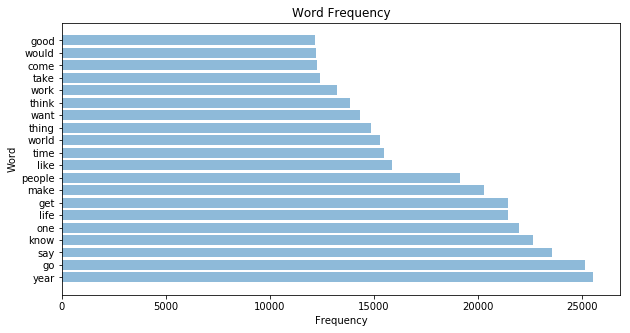

In [630]:
graph_top_n_ngrams(corpus, 20, 1, 1)

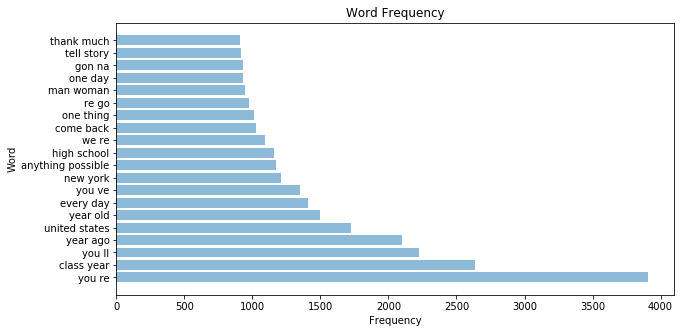

In [631]:
graph_top_n_ngrams(corpus, 20, 2, 2)

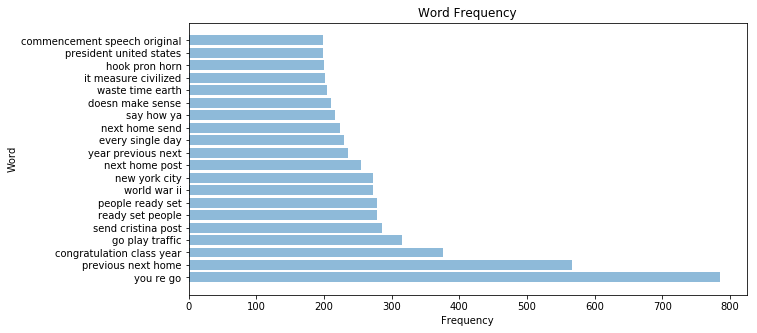

In [632]:
graph_top_n_ngrams(corpus, 20, 3, 3)

## LDA 
Topic modeling to see if there are any unifying patterns or themes across groups of articles. 

I started with a small number (5 and 10) but soon realized that the ridiculously general words ('class', 'you', 'graduate') were appearing because it would be hard to come up with just 5 topics to cover all of the speeches, so we took a hard turn and looked at 50 topics to describe all 1100 articles, and that went much better! But still, it could be better -- there were topics that seemed like they _had_ to only apply to one or two addresses, so I took a stab at reducing the number of topics to find the most broad, while still informative, topics.

In [634]:
import gensim
from gensim.corpora import Dictionary

dictionary = Dictionary(df.processed.tolist())
doc_term_matrix = [dictionary.doc2bow(doc) for doc in df.processed.tolist()]

In [635]:
from gensim.models import LdaMulticore
lda = LdaMulticore(doc_term_matrix, id2word=dictionary, num_topics=10, random_state = 10,
                  chunksize=100, passes=10, per_word_topics=True)
lda.print_topics()

[(0,
  '0.017*"get" + 0.015*"say" + 0.013*"go" + 0.011*"know" + 0.010*"\x94" + 0.009*"tell" + 0.008*"year" + 0.008*"like" + 0.008*"one" + 0.007*"i\x92m"'),
 (1,
  '0.011*"year" + 0.010*"know" + 0.010*"get" + 0.009*"go" + 0.009*"one" + 0.008*"make" + 0.007*"time" + 0.007*"people" + 0.007*"today" + 0.007*"say"'),
 (2,
  '0.011*"life" + 0.010*"make" + 0.010*"year" + 0.008*"go" + 0.008*"one" + 0.007*"\x97" + 0.007*"thing" + 0.006*"work" + 0.006*"world" + 0.006*"day"'),
 (3,
  '0.015*"go" + 0.010*"year" + 0.010*"think" + 0.010*"say" + 0.009*"people" + 0.009*"get" + 0.008*"one" + 0.008*"thing" + 0.007*"world" + 0.006*"make"'),
 (4,
  '0.011*"know" + 0.011*"go" + 0.009*"year" + 0.009*"life" + 0.009*"get" + 0.009*"people" + 0.008*"say" + 0.008*"make" + 0.007*"one" + 0.007*"\x94"'),
 (5,
  '0.010*"\x97" + 0.010*"take" + 0.010*"people" + 0.009*"year" + 0.008*"make" + 0.008*"work" + 0.008*"one" + 0.006*"would" + 0.006*"fear" + 0.006*"speech"'),
 (6,
  '0.022*"say" + 0.012*"god" + 0.012*"go" + 0.0

In [636]:
lda = LdaMulticore(doc_term_matrix, id2word=dictionary, num_topics=50, random_state = 10,
                  chunksize=100, passes=10, per_word_topics=True)

In [580]:
pip install WordCloud

     |████████████████████████████████| 163kB 4.9MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


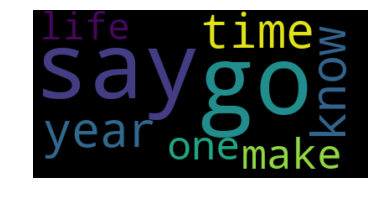

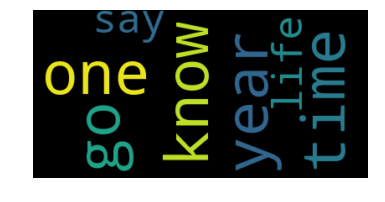

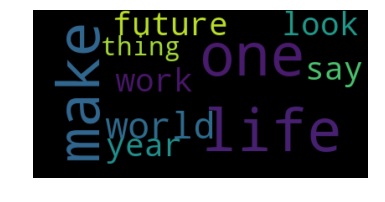

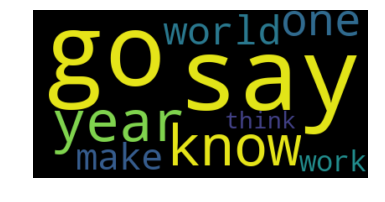

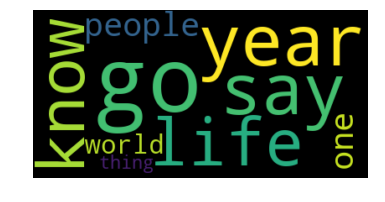

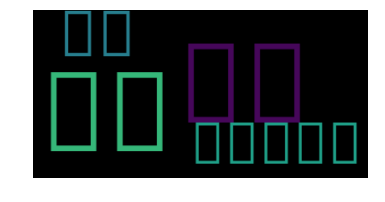

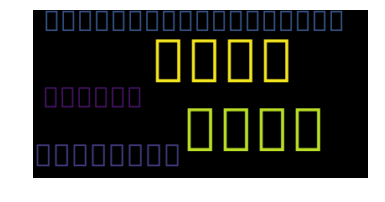

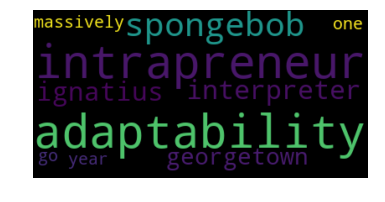

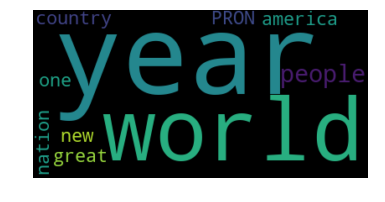

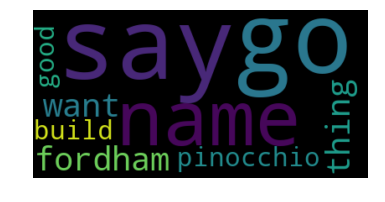

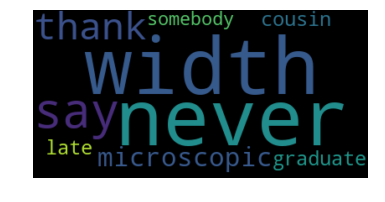

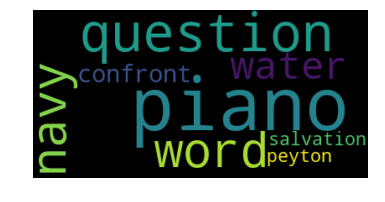

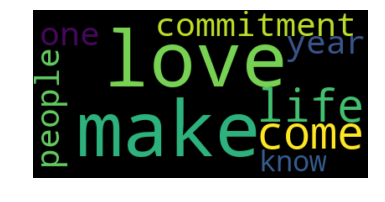

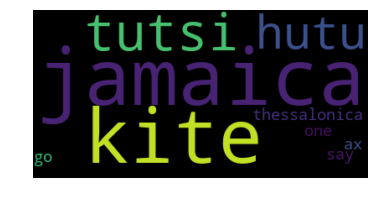

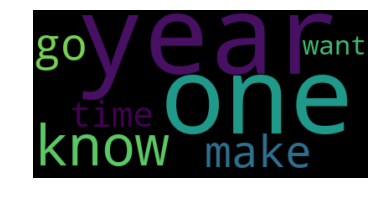

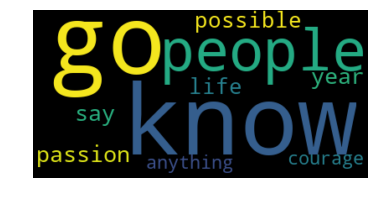

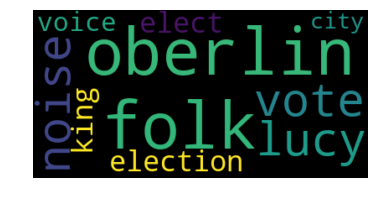

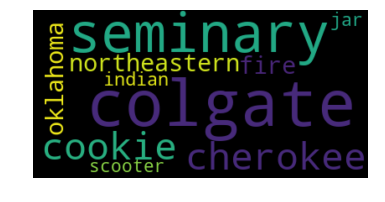

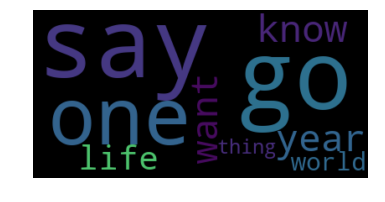

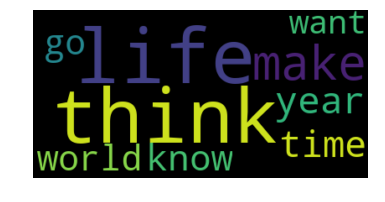

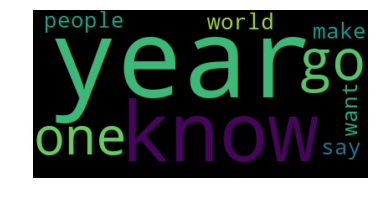

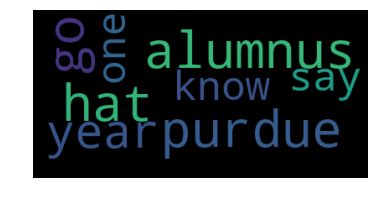

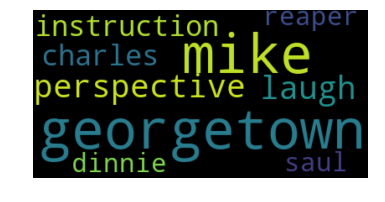

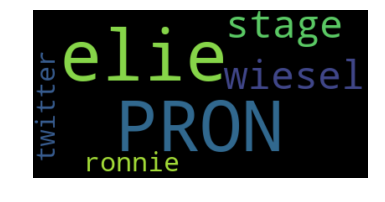

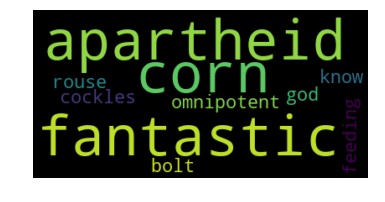

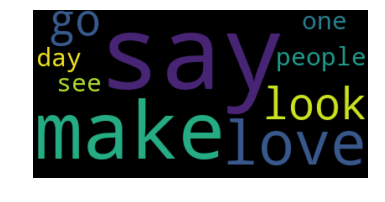

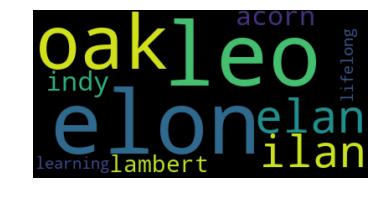

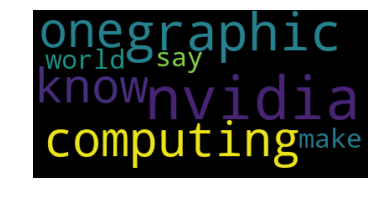

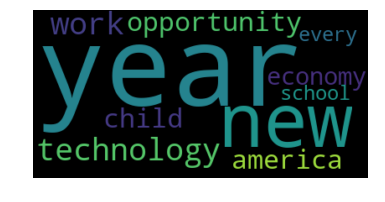

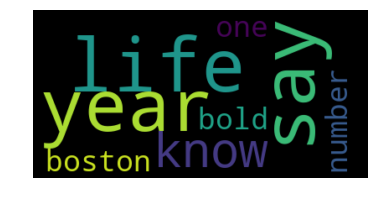

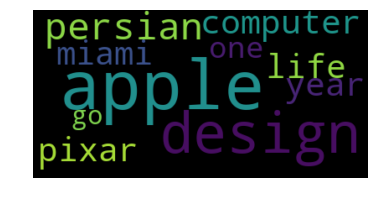

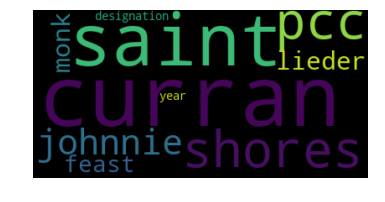

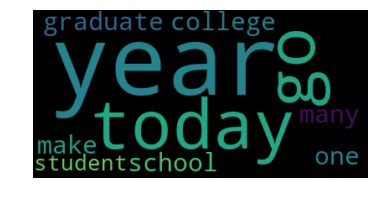

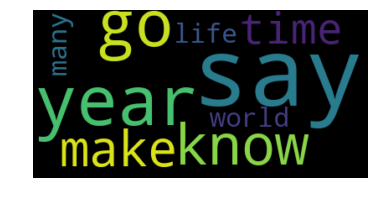

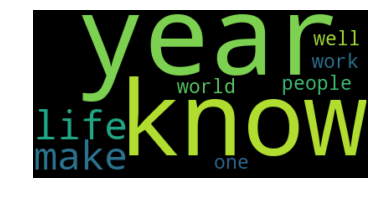

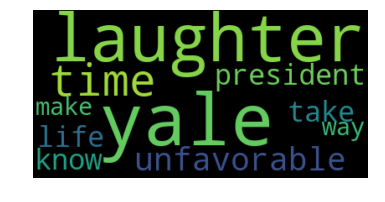

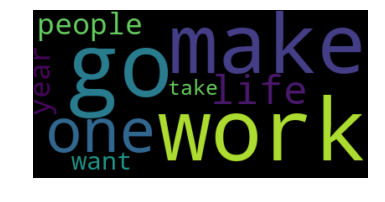

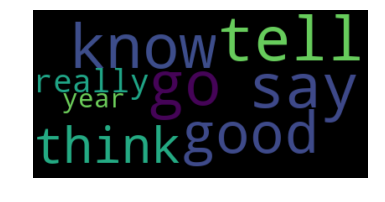

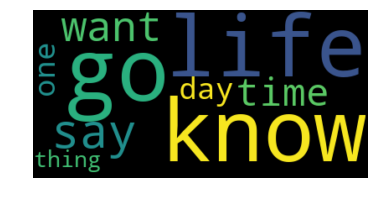

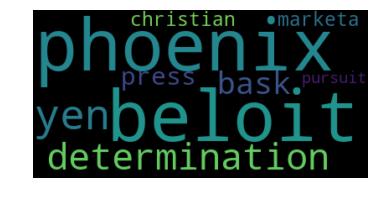

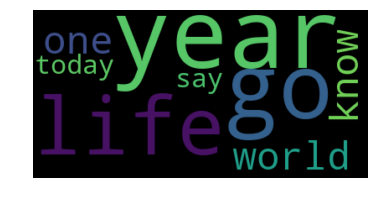

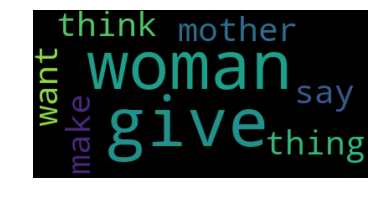

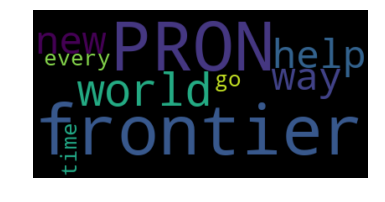

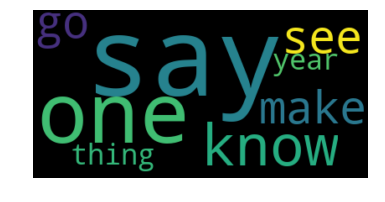

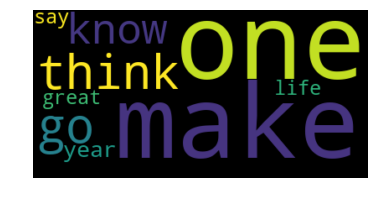

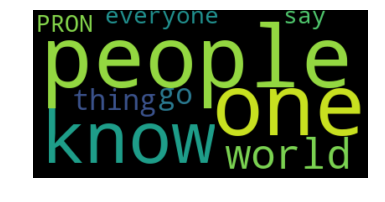

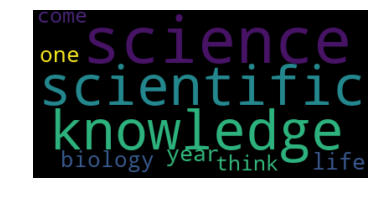

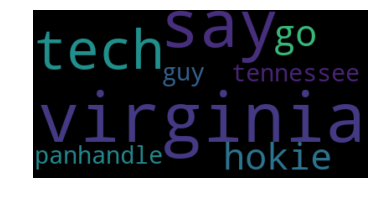

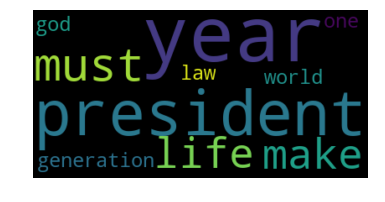

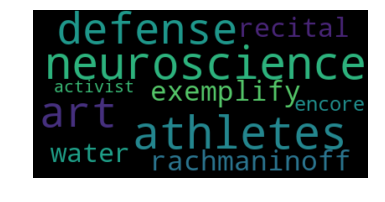

In [637]:
from wordcloud import WordCloud
for i in range(50):
    wordcloud = WordCloud().generate(lda.print_topic(i))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [638]:
def get_topics_and_wordclouds(corpus, n, random_state=10, chunksize=100, 
                             passes=10):
    """
    Uses LDA to get topics for a corpus and plots associated word clouds.
    Returns the topics, if you need them.
    n: number of topics
    See Gensim LDA documentation for chunksize and passes description.
    (https://radimrehurek.com/gensim/models/ldamulticore.html)
    """
    print('Putting together the dictionary...')
    dictionary = Dictionary(corpus)
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in corpus]
    
    print('Done! Getting topics...')
    lda = LdaMulticore(doc_term_matrix, id2word=dictionary, num_topics=n, random_state = random_state,
                  chunksize=chunksize, passes=passes, per_word_topics=True)
    
    print('Done! Word clouds:')
    for i in range(n):
        wordcloud = WordCloud().generate(lda.print_topic(i))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
        
    return lda.print_topics()

Putting together the dictionary...
Done! Getting topics...
Done! Word clouds:


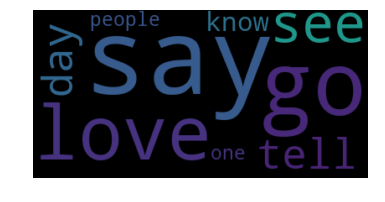

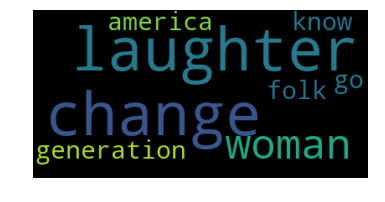

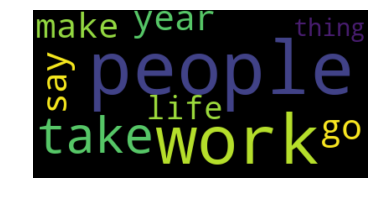

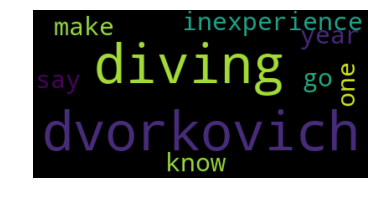

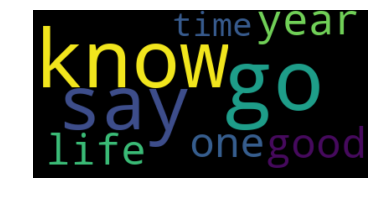

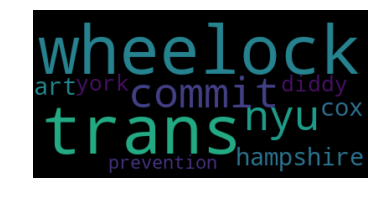

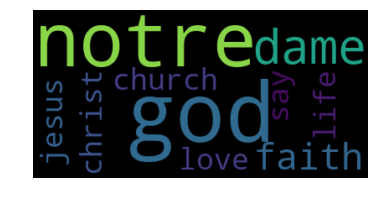

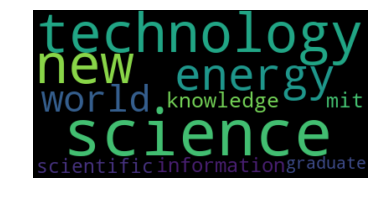

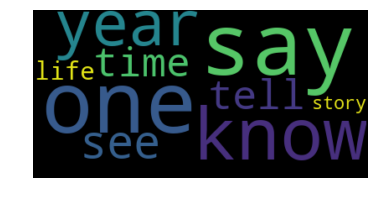

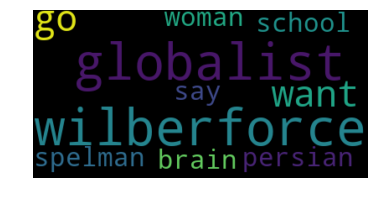

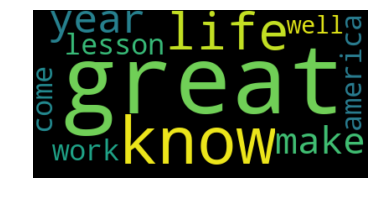

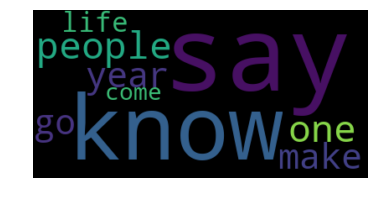

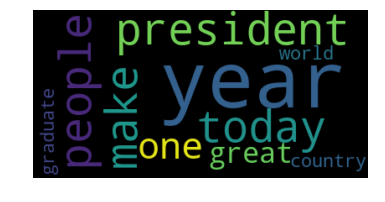

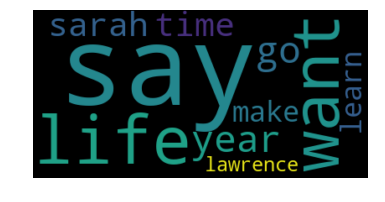

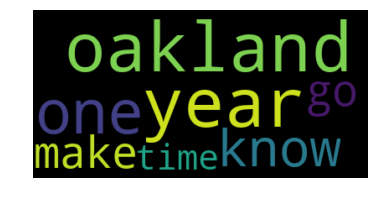

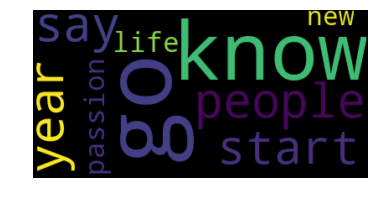

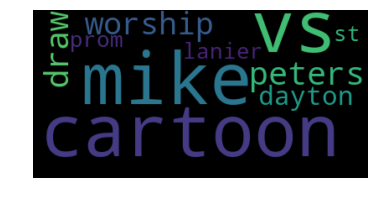

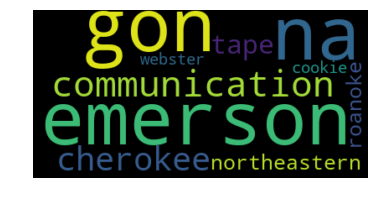

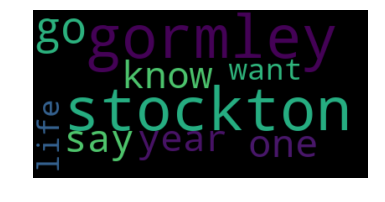

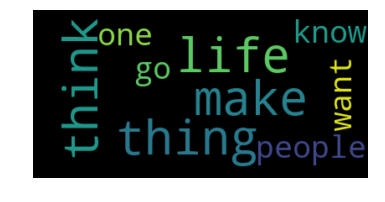

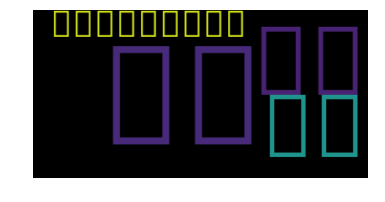

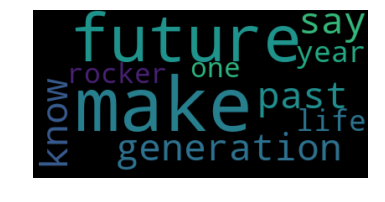

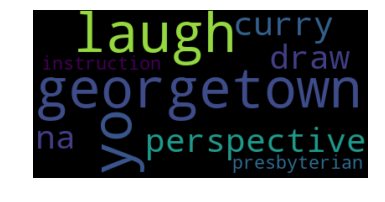

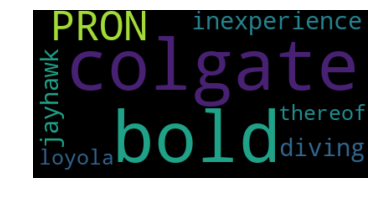

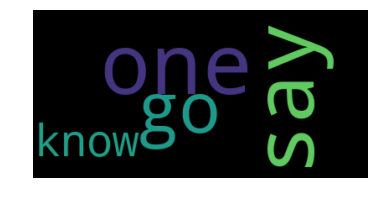

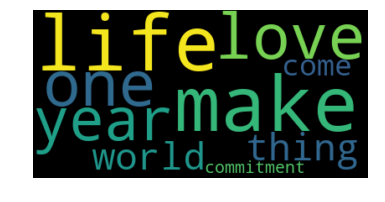

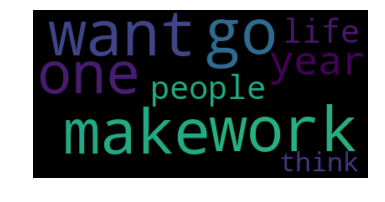

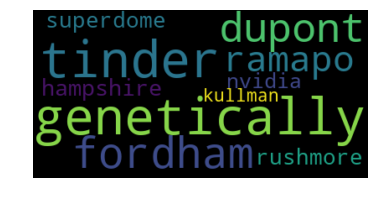

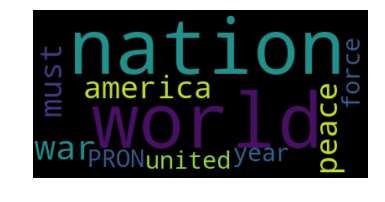

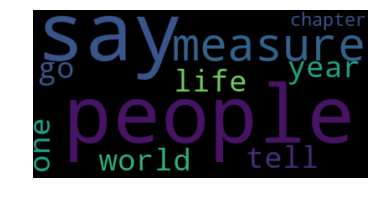

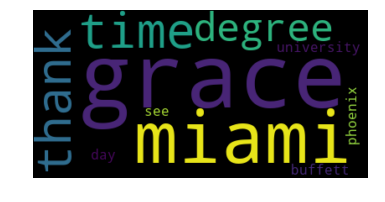

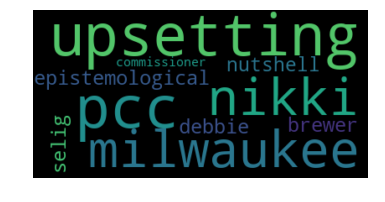

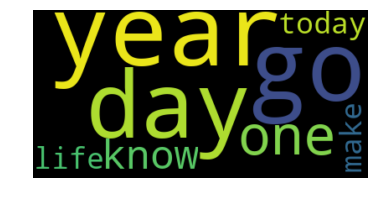

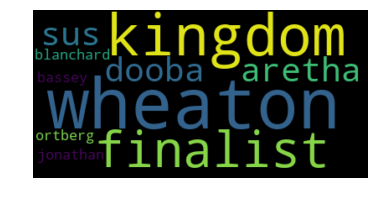

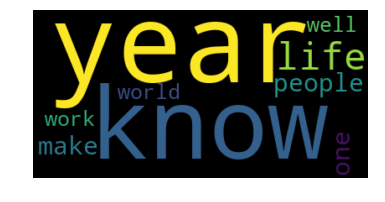

[(25,
  '0.014*"make" + 0.014*"life" + 0.013*"love" + 0.010*"one" + 0.008*"year" + 0.007*"thing" + 0.007*"world" + 0.007*"come" + 0.007*"like" + 0.007*"commitment"'),
 (3,
  '0.002*"dvorkovich" + 0.001*"diving" + 0.000*"inexperience" + 0.000*"get" + 0.000*"year" + 0.000*"say" + 0.000*"go" + 0.000*"know" + 0.000*"make" + 0.000*"one"'),
 (9,
  '0.030*"wilberforce" + 0.017*"globalist" + 0.013*"go" + 0.013*"want" + 0.012*"spelman" + 0.012*"woman" + 0.011*"persian" + 0.008*"say" + 0.008*"school" + 0.007*"brain"'),
 (29,
  '0.017*"say" + 0.014*"people" + 0.013*"measure" + 0.012*"year" + 0.012*"world" + 0.011*"tell" + 0.010*"go" + 0.009*"life" + 0.009*"one" + 0.008*"chapter"'),
 (2,
  '0.015*"people" + 0.013*"work" + 0.012*"take" + 0.011*"get" + 0.010*"year" + 0.010*"go" + 0.009*"say" + 0.009*"make" + 0.009*"life" + 0.008*"thing"'),
 (14,
  '0.004*"oakland" + 0.000*"year" + 0.000*"one" + 0.000*"know" + 0.000*"get" + 0.000*"make" + 0.000*"go" + 0.000*"would" + 0.000*"like" + 0.000*"time"'),
 (

In [639]:
get_topics_and_wordclouds(df.processed, 35)

Putting together the dictionary...
Done! Getting topics...
Done! Word clouds:


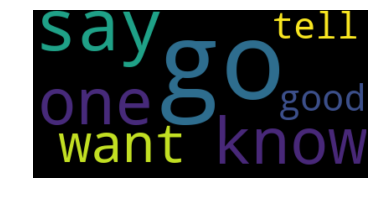

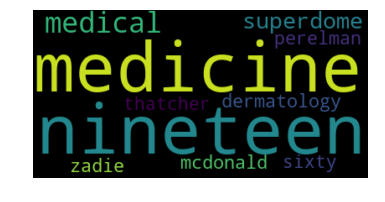

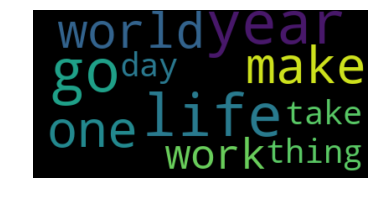

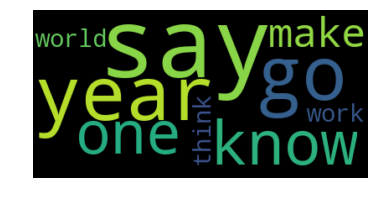

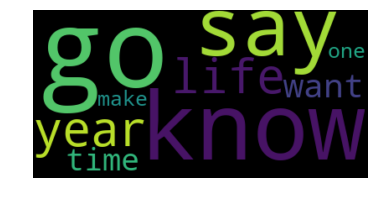

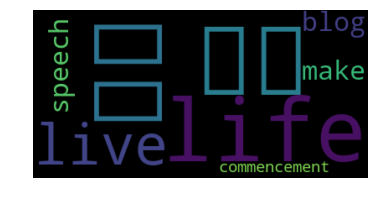

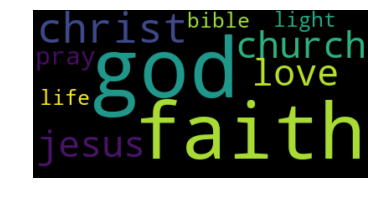

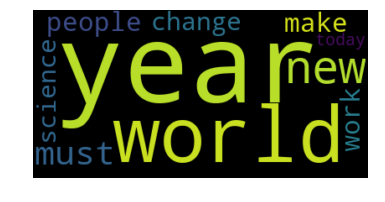

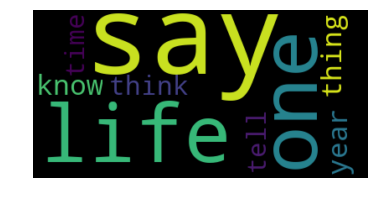

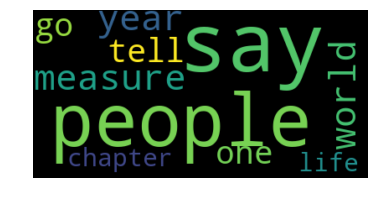

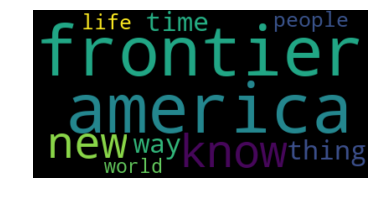

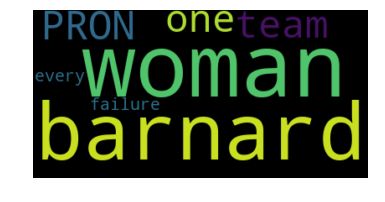

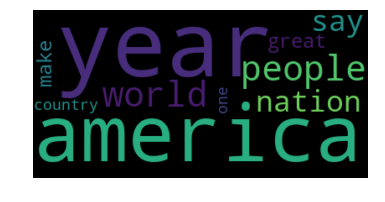

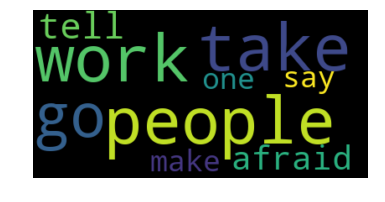

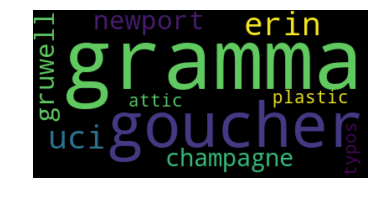

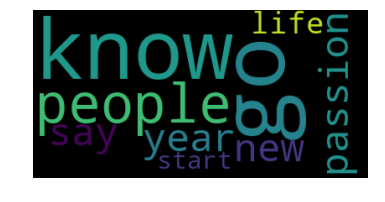

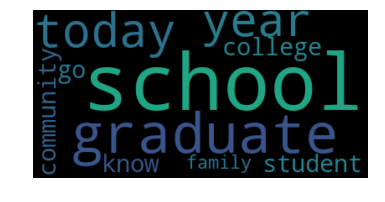

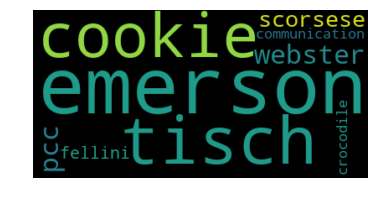

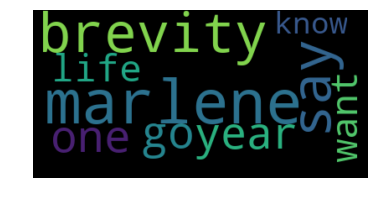

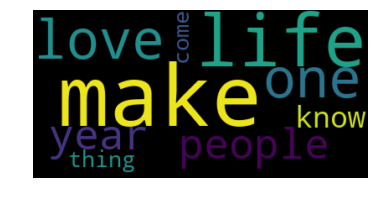

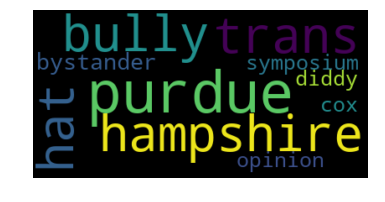

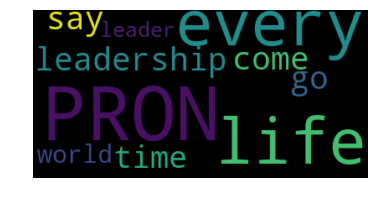

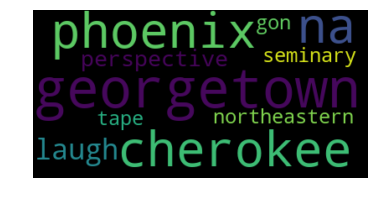

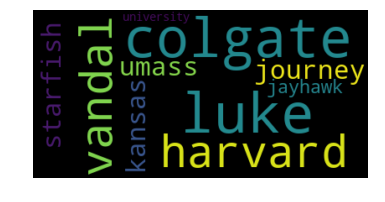

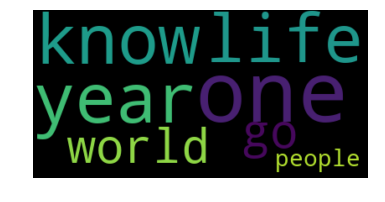

[(2,
  '0.012*"life" + 0.011*"year" + 0.008*"go" + 0.008*"make" + 0.008*"one" + 0.008*"world" + 0.008*"work" + 0.008*"thing" + 0.007*"day" + 0.006*"take"'),
 (23,
  '0.011*"luke" + 0.010*"colgate" + 0.007*"harvard" + 0.006*"vandal" + 0.006*"journey" + 0.005*"starfish" + 0.005*"umass" + 0.005*"kansas" + 0.005*"jayhawk" + 0.004*"university"'),
 (17,
  '0.015*"emerson" + 0.010*"tisch" + 0.008*"cookie" + 0.007*"webster" + 0.006*"pcc" + 0.006*"scorsese" + 0.005*"fellini" + 0.003*""" + 0.003*"communication" + 0.003*"crocodile"'),
 (22,
  '0.011*"georgetown" + 0.010*"phoenix" + 0.009*"na" + 0.008*"cherokee" + 0.008*"laugh" + 0.007*"perspective" + 0.007*"northeastern" + 0.006*"seminary" + 0.006*"gon" + 0.006*"tape"'),
 (18,
  '0.004*"marlene" + 0.001*"brevity" + 0.000*"say" + 0.000*"go" + 0.000*"one" + 0.000*"year" + 0.000*"life" + 0.000*"want" + 0.000*"know" + 0.000*"get"'),
 (11,
  '0.266*"—" + 0.027*""" + 0.018*"woman" + 0.012*"be" + 0.010*"barnard" + 0.008*"-PRON-" + 0.007*"team" + 0.006*"

In [640]:
get_topics_and_wordclouds(df.processed, 25)

Putting together the dictionary...
Done! Getting topics...
Done! Word clouds:


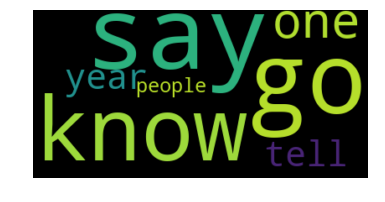

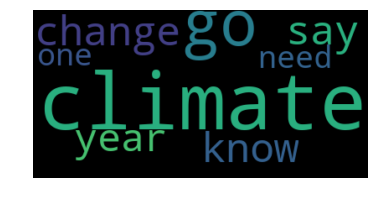

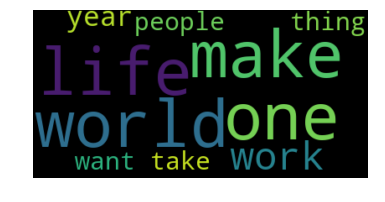

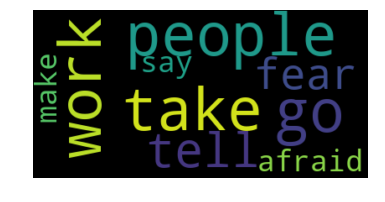

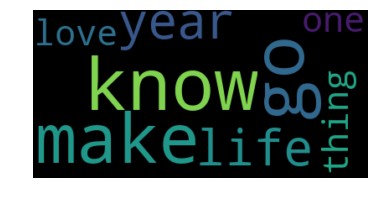

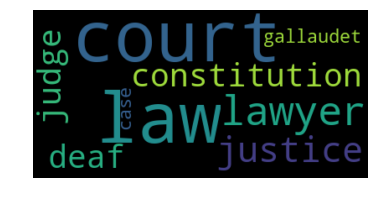

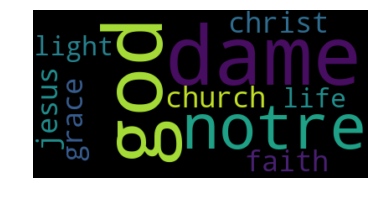

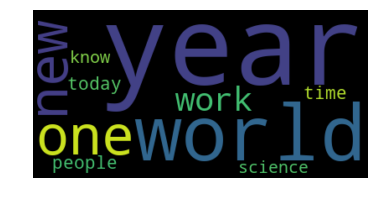

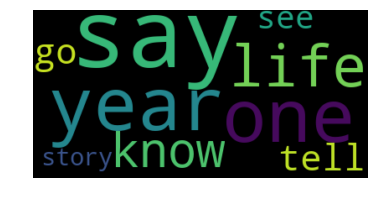

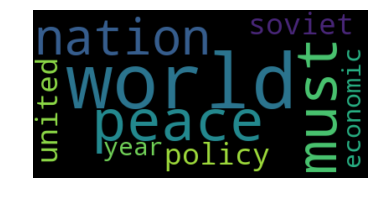

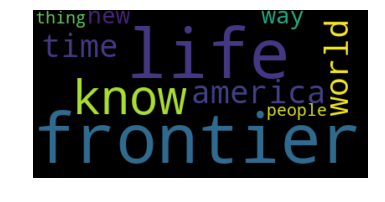

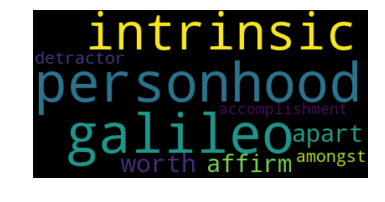

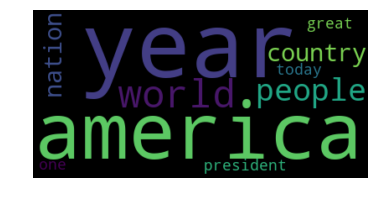

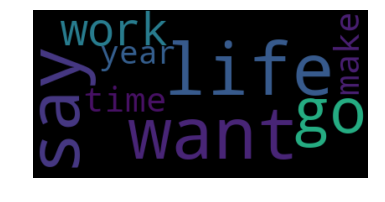

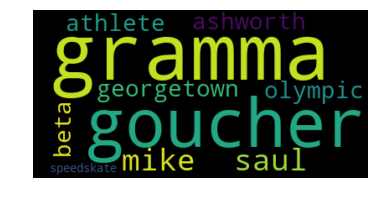

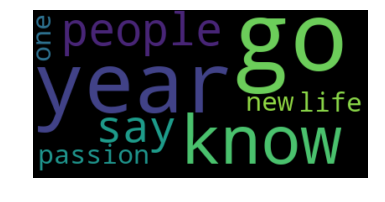

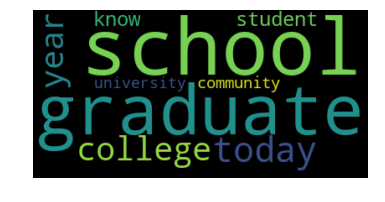

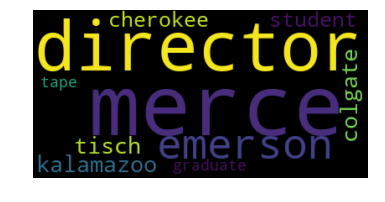

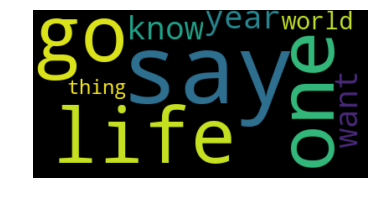

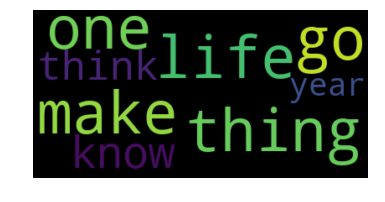

[(0,
  '0.021*"say" + 0.021*"get" + 0.018*"go" + 0.014*"know" + 0.010*"like" + 0.010*"one" + 0.009*"year" + 0.009*"tell" + 0.008*"would" + 0.008*"people"'),
 (1,
  '0.014*"climate" + 0.010*"go" + 0.010*"change" + 0.009*"say" + 0.008*"get" + 0.007*"know" + 0.007*"—" + 0.006*"year" + 0.006*"need" + 0.006*"one"'),
 (2,
  '0.013*"life" + 0.011*"make" + 0.009*"world" + 0.009*"one" + 0.009*"work" + 0.009*"year" + 0.007*"people" + 0.006*"thing" + 0.006*"want" + 0.006*"take"'),
 (3,
  '0.015*"take" + 0.015*"people" + 0.013*"work" + 0.012*"get" + 0.011*"go" + 0.011*"tell" + 0.010*"fear" + 0.010*"afraid" + 0.010*"say" + 0.010*"make"'),
 (4,
  '0.011*"get" + 0.011*"know" + 0.010*"go" + 0.009*"make" + 0.009*"year" + 0.009*"life" + 0.008*"like" + 0.008*"love" + 0.008*"one" + 0.007*"thing"'),
 (5,
  '0.032*"。" + 0.019*"law" + 0.015*"court" + 0.013*"lawyer" + 0.012*"justice" + 0.009*"constitution" + 0.009*"deaf" + 0.008*"judge" + 0.008*"gallaudet" + 0.007*"case"'),
 (6,
  '0.062*"god" + 0.020*"dame" 

In [641]:
get_topics_and_wordclouds(df.processed, 20)

Putting together the dictionary...
Done! Getting topics...
Done! Word clouds:


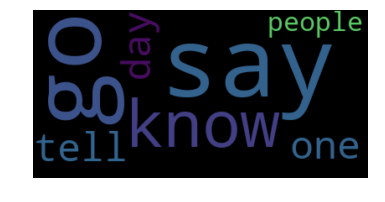

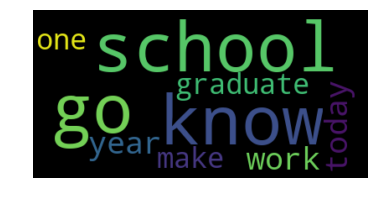

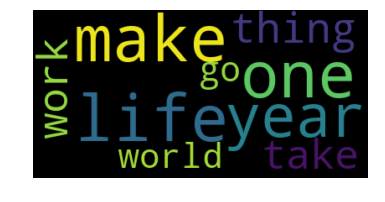

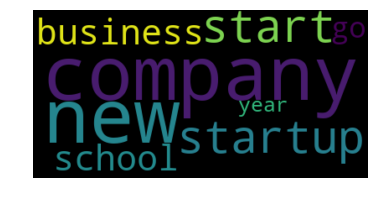

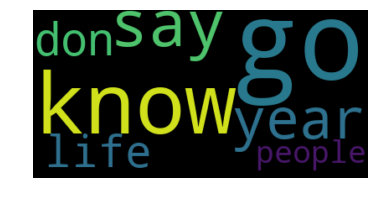

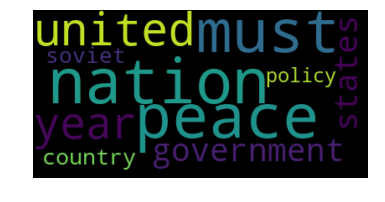

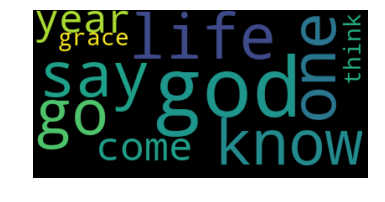

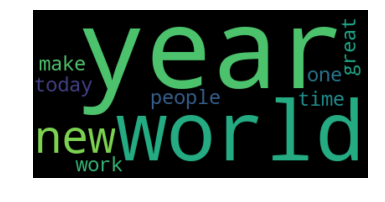

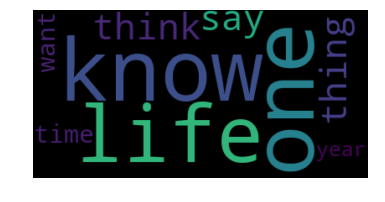

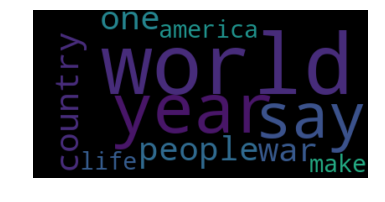

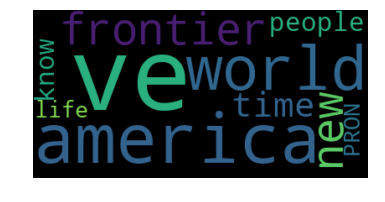

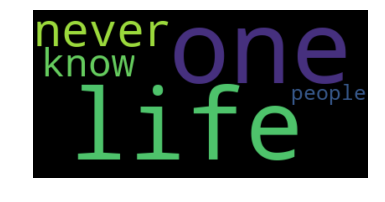

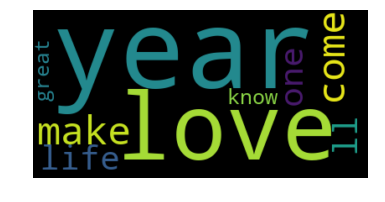

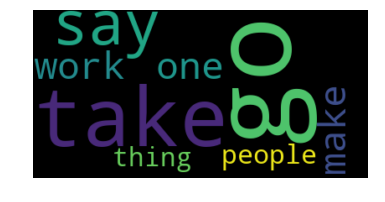

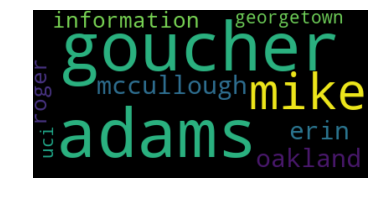

[(0,
  '0.021*"say" + 0.019*"get" + 0.018*"go" + 0.011*"know" + 0.009*"like" + 0.009*"tell" + 0.009*"one" + 0.009*"day" + 0.009*"\x94" + 0.008*"people"'),
 (1,
  '0.013*"get" + 0.011*"know" + 0.010*"go" + 0.010*"school" + 0.009*"year" + 0.009*"today" + 0.009*"work" + 0.008*"graduate" + 0.008*"one" + 0.007*"make"'),
 (2,
  '0.013*"life" + 0.012*"make" + 0.009*"one" + 0.008*"year" + 0.008*"thing" + 0.008*"\x97" + 0.007*"work" + 0.007*"take" + 0.007*"go" + 0.007*"world"'),
 (3,
  '0.030*"can\x92t" + 0.021*"company" + 0.017*"i\x92d" + 0.017*"new" + 0.012*"startup" + 0.012*"start" + 0.010*"business" + 0.009*"school" + 0.009*"go" + 0.009*"year"'),
 (4,
  '0.015*"\x94" + 0.014*"go" + 0.013*"know" + 0.012*"it\x92s" + 0.011*"say" + 0.011*"year" + 0.011*"get" + 0.010*"don\x92t" + 0.010*"life" + 0.009*"people"'),
 (5,
  '0.012*"nation" + 0.010*"peace" + 0.009*"must" + 0.008*"united" + 0.007*"year" + 0.007*"government" + 0.007*"states" + 0.006*"country" + 0.006*"soviet" + 0.006*"policy"'),
 (6,
  

In [642]:
get_topics_and_wordclouds(df.processed, 15)

Putting together the dictionary...
Done! Getting topics...
Done! Word clouds:


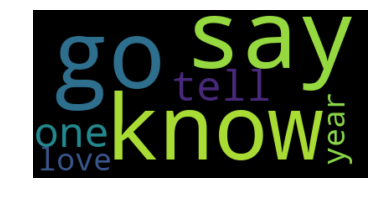

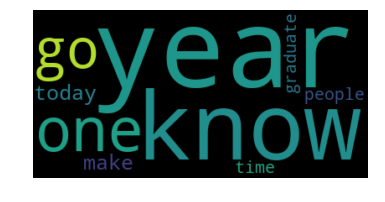

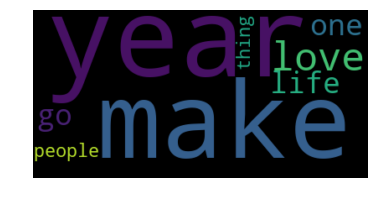

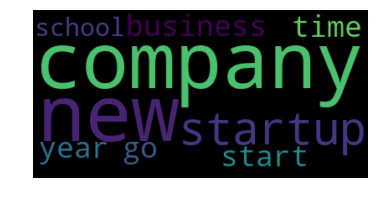

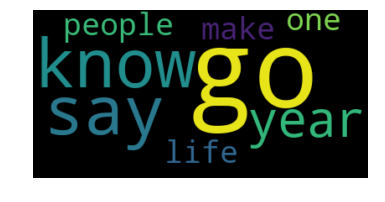

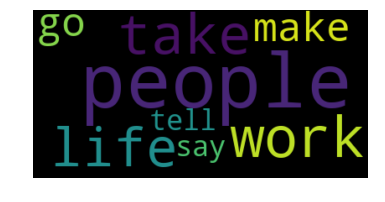

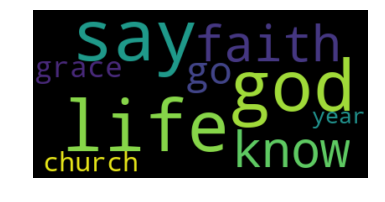

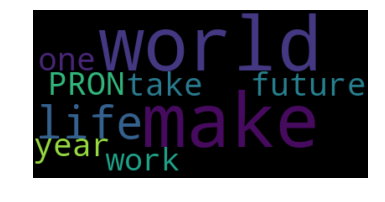

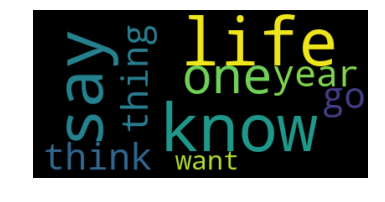

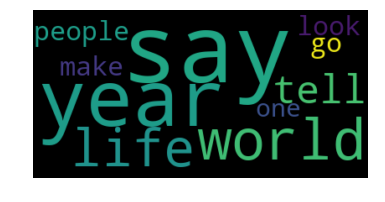

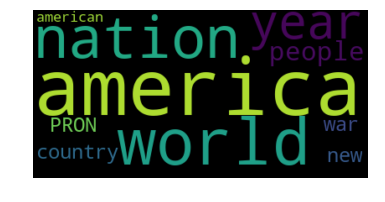

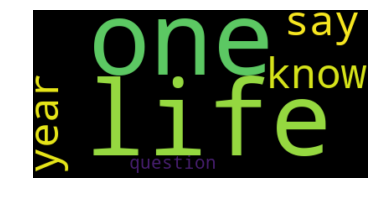

[(0,
  '0.020*"say" + 0.017*"get" + 0.017*"go" + 0.010*"know" + 0.009*"\x94" + 0.009*"like" + 0.009*"tell" + 0.009*"one" + 0.008*"love" + 0.008*"year"'),
 (1,
  '0.013*"year" + 0.008*"know" + 0.008*"one" + 0.008*"go" + 0.008*"get" + 0.007*"today" + 0.007*"make" + 0.007*"people" + 0.007*"time" + 0.007*"graduate"'),
 (2,
  '0.011*"year" + 0.011*"make" + 0.010*"love" + 0.010*"life" + 0.009*"go" + 0.009*"one" + 0.007*"like" + 0.007*"people" + 0.007*"thing" + 0.007*"\x97"'),
 (3,
  '0.019*"company" + 0.015*"new" + 0.011*"startup" + 0.011*"go" + 0.010*"business" + 0.010*"start" + 0.008*"would" + 0.008*"time" + 0.008*"year" + 0.008*"school"'),
 (4,
  '0.013*"go" + 0.013*"know" + 0.012*"get" + 0.010*"\x94" + 0.010*"say" + 0.009*"year" + 0.008*"people" + 0.008*"life" + 0.007*"one" + 0.007*"make"'),
 (5,
  '0.016*"\x97" + 0.014*"people" + 0.013*"work" + 0.013*"take" + 0.010*"get" + 0.009*"life" + 0.008*"make" + 0.008*"go" + 0.008*"tell" + 0.007*"say"'),
 (6,
  '0.025*"god" + 0.010*"say" + 0.007*

In [643]:
get_topics_and_wordclouds(df.processed, 12)

Putting together the dictionary...
Done! Getting topics...
Done! Word clouds:


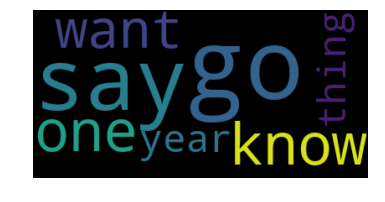

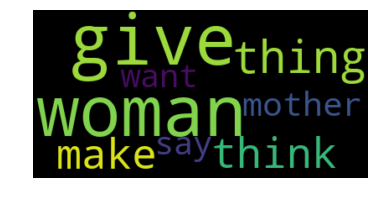

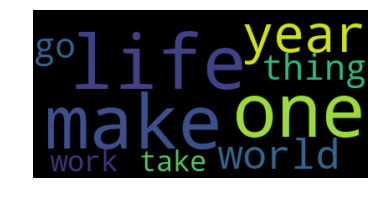

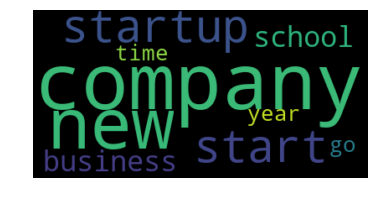

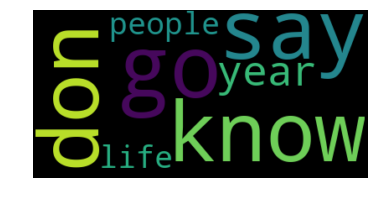

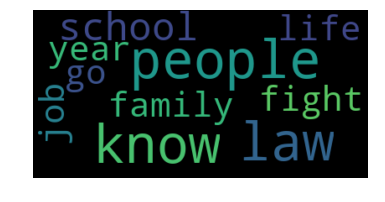

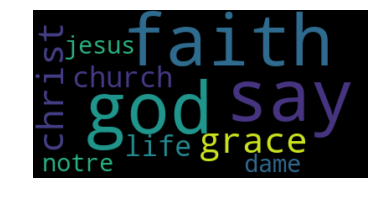

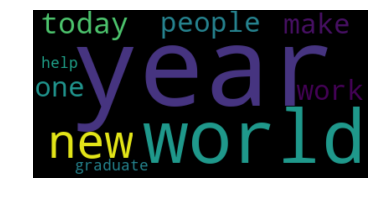

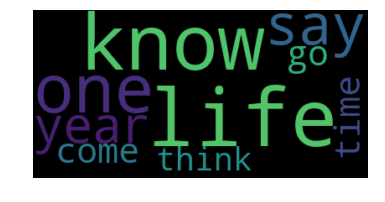

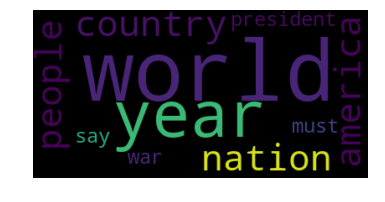

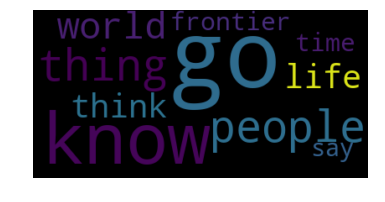

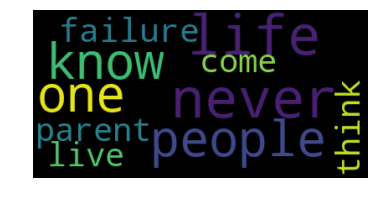

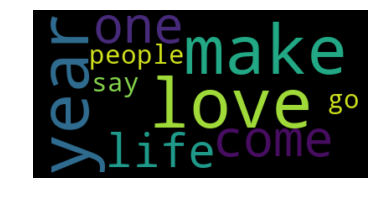

[(0,
  '0.018*"get" + 0.017*"go" + 0.015*"say" + 0.015*"know" + 0.010*"one" + 0.010*"want" + 0.010*"like" + 0.009*"year" + 0.008*"would" + 0.008*"thing"'),
 (1,
  '0.019*"woman" + 0.015*"give" + 0.014*"thing" + 0.012*"think" + 0.010*"like" + 0.010*"make" + 0.010*"mother" + 0.010*"would" + 0.009*"say" + 0.009*"want"'),
 (2,
  '0.012*"life" + 0.011*"make" + 0.009*"one" + 0.008*"year" + 0.008*"world" + 0.008*"thing" + 0.007*"go" + 0.007*"\x97" + 0.007*"work" + 0.006*"take"'),
 (3,
  '0.018*"company" + 0.016*"new" + 0.014*"startup" + 0.011*"start" + 0.009*"business" + 0.009*"school" + 0.008*"year" + 0.008*"go" + 0.008*"time" + 0.008*"would"'),
 (4,
  '0.016*"\x94" + 0.013*"go" + 0.012*"get" + 0.011*"know" + 0.011*"don\x92t" + 0.011*"it\x92s" + 0.010*"say" + 0.009*"year" + 0.009*"people" + 0.009*"life"'),
 (5,
  '0.016*"law" + 0.011*"people" + 0.010*"know" + 0.009*"school" + 0.009*"family" + 0.009*"fight" + 0.008*"year" + 0.008*"job" + 0.008*"life" + 0.007*"go"'),
 (6,
  '0.036*"god" + 0.01

In [644]:
get_topics_and_wordclouds(df.processed, 13)

I think I'm happiest with 13 topics. There aren't overly specific topics in there, while they still appear to cover a range of ideas. 

How often do these topics appear? How are they distributed across texts? Now I'll take a look at the top 3 topics for each commencement address, plotting them separately. 

In [684]:
lda = LdaMulticore(doc_term_matrix, id2word=dictionary, num_topics=13, random_state = 10,
                  chunksize=100, passes=30, per_word_topics=True)

In [685]:
# Top topic for each speech
x = [sorted(lda[doc_term_matrix[i]][0], key = lambda x: x[1])[-1][0] for i in range(len(doc_term_matrix))]

In [710]:
# Second most probable topic for each speech
x2 = [sorted(lda[doc_term_matrix[i]][0], key = lambda x: x[1])[-2][0] for i in range(len(doc_term_matrix)) if len(lda[doc_term_matrix[i]][0]) > 1]

In [716]:
# Third most probable topic for each speech
x3 = [sorted(lda[doc_term_matrix[i]][0], key = lambda x: x[1])[-3][0] for i in range(len(doc_term_matrix)) if len(lda[doc_term_matrix[i]][0]) > 2]

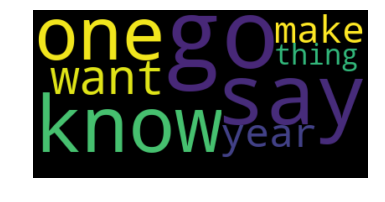

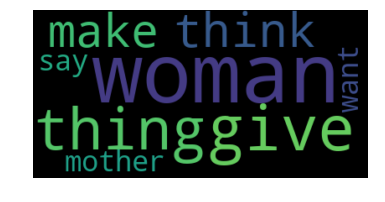

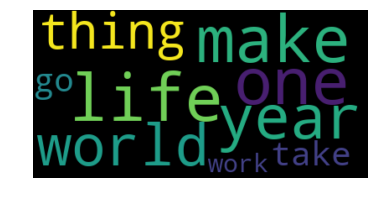

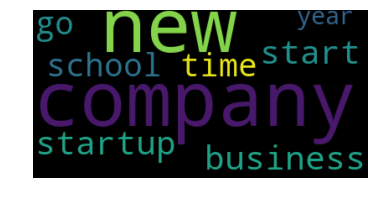

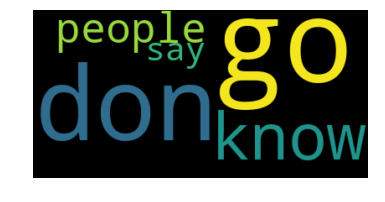

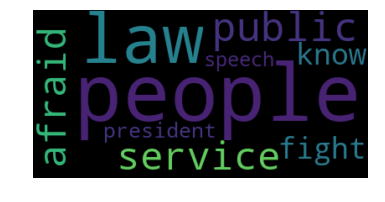

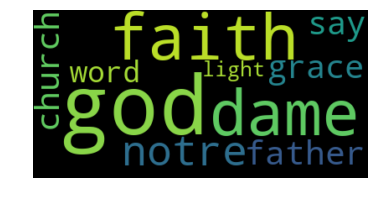

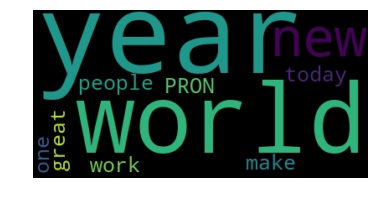

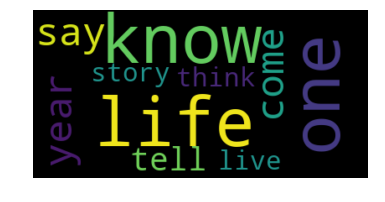

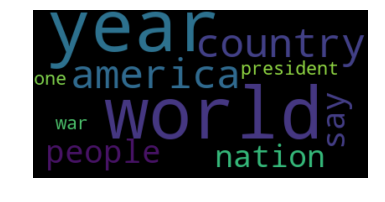

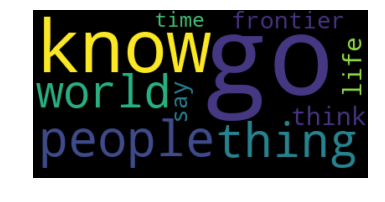

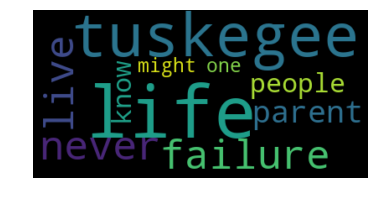

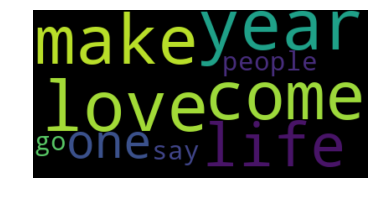

In [689]:
for i in range(13):
        wordcloud = WordCloud().generate(lda.print_topic(i))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()

In [686]:
pd.Series(x).value_counts()

0     628
7     342
9      59
8      49
2      12
4      10
12      7
10      7
5       5
6       4
1       3
11      2
3       1
dtype: int64

Text(0.5, 1.0, 'Distribution of Top Most Probable Topic')

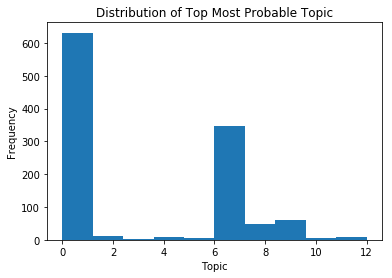

In [713]:
fig, ax = plt.subplots(1, 1)
ax.hist(x)
ax.set_xlabel('Topic')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Top Most Probable Topic')

Text(0.5, 1.0, 'Distribution of Second Most Probable Topic')

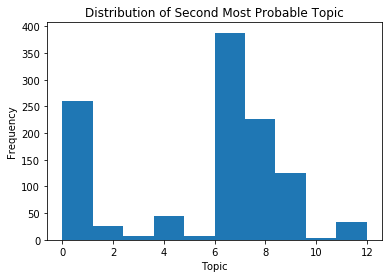

In [714]:
fig, ax = plt.subplots(1, 1)
ax.hist(x2)
ax.set_xlabel('Topic')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Second Most Probable Topic')

Text(0.5, 1.0, 'Distribution of Third Most Probable Topic')

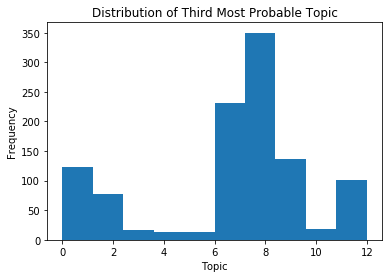

In [717]:
fig, ax = plt.subplots(1, 1)
ax.hist(x3)
ax.set_xlabel('Topic')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Third Most Probable Topic')

## A Few More Visuals

How long are commencement addresses, usually? (NOTE: There are some that are over 80000 characters, but for the most part, most speeches are much shorter, and I really wanted to see the distribution of the non-outliers!)

Text(0.5, 1.0, 'Distribution of Transcript Length')

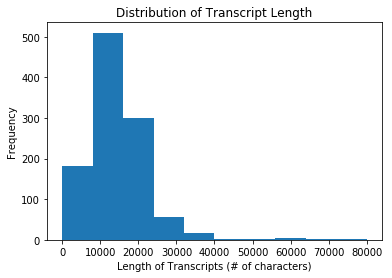

In [706]:
fig, ax = plt.subplots(1, 1)
ax.hist(df.apply(lambda x: len(x.transcript), axis=1).tolist(), range=(0, 80000))
ax.set_xlabel('Length of Transcripts (# of characters)')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Transcript Length')

How many speeches have punctutation (youtube generated transcripts will not!)? I decided most texts with both commas and periods are punctuated, since youtube will not autogenerate periods and if someone is putting in commas, it seems like they're going to take care to put in meaningful punctuation!

In [703]:
sum(df.apply(lambda x: ',' in x.transcript and '.' in x.transcript, axis=1))

601

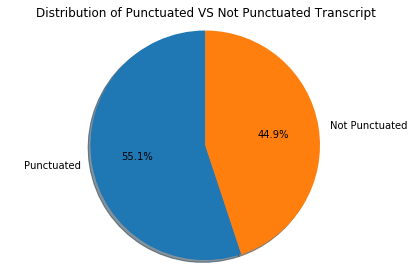

In [707]:
# Pie chart
labels = ['Punctuated', 'Not Punctuated']
sizes = [sum(df.apply(lambda x: ',' in x.transcript and '.' in x.transcript, axis=1)), len(df) - sum(df.apply(lambda x: ',' in x.transcript, axis=1))]
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal') 
ax1.set_title('Distribution of Punctuated VS Not Punctuated Transcript')
plt.tight_layout()
plt.show()

How is sentiment distributed across speeches? Transcripts were split up into fifths, since the mean length was roughly 20,000 characters, which translates into roughly 3300 words (if we assume every word is around 6 characters), which translates into around 22 minutes (if we assume people talk at 150WPM), making each chunk around 5 minutes long -- long enough to get a single point across (source: https://www.visualthesaurus.com/cm/wc/seven-ways-to-write-a-better-speech/). Then they were aggregated by taking the mean to get an idea of the overall sentiment of the speech. Used textblob because they specifically did _not_ train their classifier on twitter data, unlike VADER and Afinn. 

In [736]:
from textblob import TextBlob

subj = []
pol = []
for doc in df.transcript.tolist():
    doc_len = len(doc)
    sentiment_pol = 0.0
    sentiment_subj = 0.0
    for i in range(0, doc_len, int(doc_len/5)):
        sentiment_pol += TextBlob(doc[i: i + doc_len]).sentiment.polarity
        sentiment_subj += TextBlob(doc[i: i + doc_len]).sentiment.subjectivity
    pol.append(sentiment_pol/5)
    subj.append(sentiment_subj/5)

Text(0.5, 1.0, 'Distribution of Mean Subjectivity')

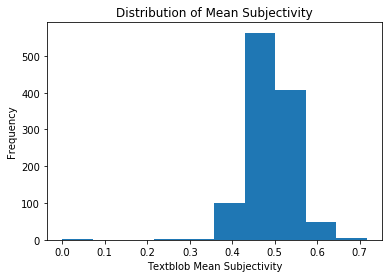

In [728]:
fig, ax = plt.subplots(1, 1)
ax.hist(subj)
ax.set_xlabel('Textblob Mean Subjectivity')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Mean Subjectivity')

Text(0.5, 1.0, 'Distribution of Mean Polarity')

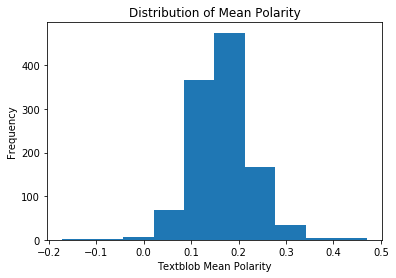

In [727]:
fig, ax = plt.subplots(1, 1)
ax.hist(pol)
ax.set_xlabel('Textblob Mean Polarity')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Mean Polarity')

In [733]:
med_subj = []
med_pol = []
for doc in df.transcript.tolist():
    doc_len = len(doc)
    sentiment_pol = []
    sentiment_subj = []
    for i in range(0, doc_len, int(doc_len/5)):
        sentiment_pol.append(TextBlob(doc[i: i + doc_len]).sentiment.polarity)
        sentiment_subj.append(TextBlob(doc[i: i + doc_len]).sentiment.subjectivity)
    med_pol.append(np.median(sentiment_pol))
    med_subj.append(np.median(sentiment_subj))

Text(0.5, 1.0, 'Distribution of Median Subjectivity')

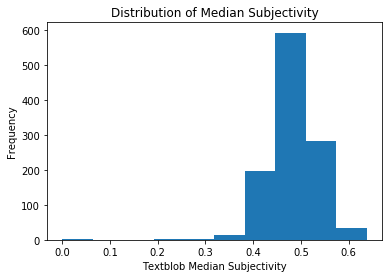

In [734]:
fig, ax = plt.subplots(1, 1)
ax.hist(med_subj)
ax.set_xlabel('Textblob Median Subjectivity')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Median Subjectivity')

Text(0.5, 1.0, 'Distribution of Median Polarity')

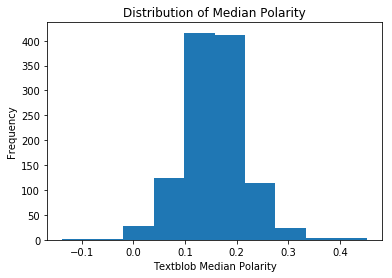

In [735]:
fig, ax = plt.subplots(1, 1)
ax.hist(med_pol)
ax.set_xlabel('Textblob Median Polarity')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Median Polarity')

Okay! I think I'm ready to see what else I can do with this data! Next step: seeing where Markov chains take us! 